In [1]:
import trimesh
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage as spim

import shapely

obj = trimesh.load('./stl_artifact/3DBenchy.stl')

In [2]:
bounding_box = obj.bounds

In [ ]:
type(obj)

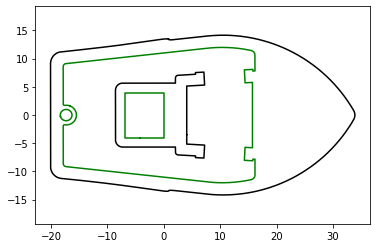

In [13]:
height = (0,0,10)
sec = obj.section(plane_origin=height, 
                     plane_normal=[0,0,1])

polygon_2d, _ = sec.to_planar()
polygon_2d.show()

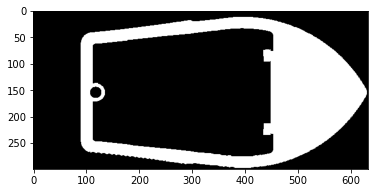

In [26]:
img_slice = np.array(polygon_2d.rasterize(0.1, bounding_box[0][0:2], fill = False))

plt.imshow(img_slice, cmap='gray')
plt.show()

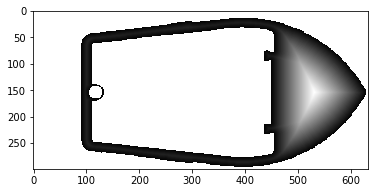

In [27]:
import numpy.ma as ma

dist_edt = spim.distance_transform_edt(img_slice)

masked_dist = ma.array(dist_edt, mask = img_slice == 0)

plt.imshow(masked_dist, cmap='gray')
plt.show()